# Correlaciones

Se hace la correlación cruzada (cross correlation) entre los distintos contaminantes. Se saca un promedio de todas las estaciones.

## I. Importar datos.

Se comienza agregando las bibliotecas necesarias de python al archivo. Las que vienen por default en este notebook son las requeridas para importar y exportar archivos _csv_, manipular dataframes en _pandas_, graficar resultados usando _seaborn_ con algún nivel de interactividad haciendo uso de _widgets_.

Dependiendo del tipo de archivo en donde se tengan los datos, o bien la herramienta de visualización, se deben agregar las bibliotecas necesarias.

Se debe de tomar en cuenta el path en el que se encuentre el archivo con los datos y modificarlo a demanda en la parte correspondiente.

Es necesario que el archivo con los datos **ya se encuentre limpio** para correr este notebook. De lo contrario pueden aparecer resultados no deseados o "raros" en las matrices de correlación.

In [1]:
# Bibliotecas necesarias para correr este notebook

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Modificar el "path" del directorio de trabajo
os.chdir("/home/pradel/Desktop/correlation/")

In [3]:
# Se importa el archivo csv con los datos usando pandas (se carga como un dataframe)

data = pd.read_csv("/home/pradel/Desktop/correlation/data_sample.csv")

In [4]:
# Se obtienen las primeras 5 filas de nuestro dataframe

data.head() 

,fecha,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,0.0,0.0,590.0,0.3,2.6,13.8,16.2,15.1,9.4,6.3,1.6,68.3,11.4,3.2,294.9,14.8
1,2012-01-01 01:00:00,0.0,0.0,587.0,1.4,30.0,39.8,69.5,5.5,77.0,136.9,7.2,68.8,9.7,1.4,180.0,174.3
2,2012-01-01 02:00:00,0.0,0.0,587.0,1.7,39.7,40.0,79.6,4.3,121.0,38.0,8.2,72.6,9.1,1.6,139.6,164.6
3,2012-01-01 03:00:00,0.0,0.0,587.0,1.8,40.8,39.1,79.6,4.6,125.1,36.7,7.6,74.1,8.6,1.1,232.6,172.9
4,2012-01-01 04:00:00,0.0,0.0,587.0,2.0,51.2,37.8,88.9,4.1,129.6,37.0,6.9,75.3,8.2,1.0,225.6,167.6


## II. Correlaciones

Se pueden mostrar las correlaciones específicas entre cada variable a demanda, usando un widget interactivo de python. De esta manera no se pierde uno buscando valores en la matriz.

In [5]:
@interact
def correlaciones(X = list(data.select_dtypes('number').columns),
                  Y = list(data.select_dtypes('number').columns)):
        
    print(f"Correlación: {data[X].corr(data[Y])}")

interactive(children=(Dropdown(description='X', options=('UVA', 'UVB', 'PA', 'CO', 'NO', 'NO2', 'NOX', 'O3', '…

In [6]:
data_corr = data.corr()

In [7]:
data_corr.head()

,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
UVA,1.000000,0.955600,0.107344,-0.046440,-0.127991,-0.113325,-0.140269,0.637839,0.275274,0.128521,-0.007434,-0.475098,0.579646,0.162357,-0.276112,0.123386
UVB,0.955600,1.000000,0.069185,-0.089377,-0.166616,-0.131420,-0.177312,0.630518,0.249498,0.093927,-0.018032,-0.466078,0.561885,0.160466,-0.256995,0.086847
PA,0.107344,0.069185,1.000000,0.184208,0.099352,0.089986,0.109460,-0.113144,0.102240,0.120426,0.069579,0.010163,-0.098367,-0.082458,0.088179,0.076456
CO,-0.046440,-0.089377,0.184208,1.000000,0.870824,0.726255,0.939645,-0.307126,0.526708,0.470420,0.177904,0.101937,-0.318787,-0.471834,-0.185674,0.593283
NO,-0.127991,-0.166616,0.099352,0.870824,1.000000,0.460770,0.956901,-0.434313,0.291982,0.373522,0.168676,0.210691,-0.464448,-0.463052,-0.101504,0.423978


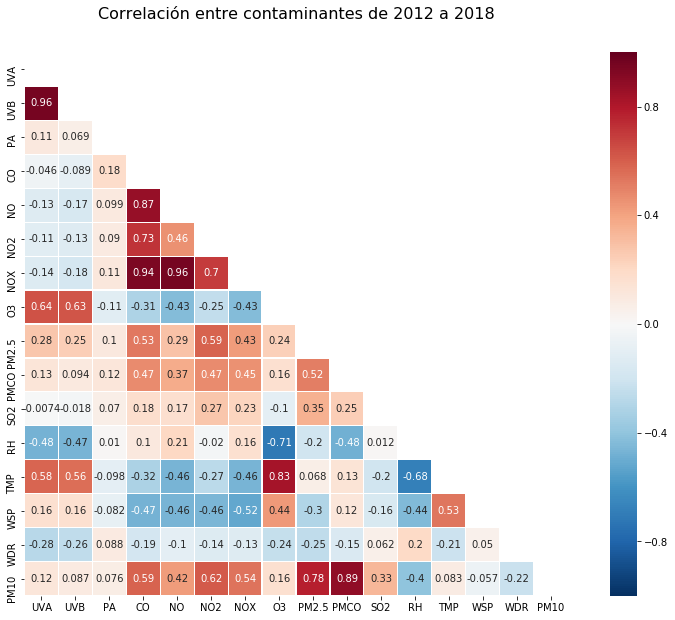

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación entre contaminantes de 2012 a 2018', y=1.05, size=16)

mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(data_corr, mask=mask, linewidths=0.1,vmin = -1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
import cufflinks as cf

@interact
def matriz(x = (0.0,1.0,0.1)):
    colormap = plt.cm.RdBu_r
    plt.figure(figsize = (17,12))
    plt.title(u'Correlaciones', y = 1.05, size = 16)
    
    testing = data.corr() # 'Copia' de la matriz de correlación
    indices = abs(testing) >= x # Encontrar los valores mayores o iguales a x en la matriz de correlación
    testing[indices] = 0 # Los valores que cumplen la condición se hacen cero (enmascaramiento)
                      
    mask = testing[indices].to_numpy() # Construimos un arreglo con el enmascaramiento
    mask[np.triu_indices_from(mask)] = True
    
    ind_row = []
    for i in range(len(mask)):
        if (0 in mask[i]) == False:
            ind_row.append(i)
            
    mask = np.delete(mask, ind_row, 0)
    
    t2 = data.corr()
    t2.drop(t2.index[ind_row], inplace=True)
    
    mask_col = np.transpose(mask)
    ind_col = []
    for j in range(len(mask_col)):
        if (0 in mask_col[j]) == False:
            ind_col.append(j)
        
    mask = np.delete(mask, ind_col, 1)
    
    t2.drop(t2.columns[ind_col],axis=1,inplace=True)
          
    svm = sns.heatmap(t2, mask=mask, linewidths = 0.1, vmin = -1.0, vmax = 1.0,
                     square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws={"fontsize":13})

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), Output()), _dom_classes=('widget-inter…